# This script takes in the created .json files and displays the data



In [1]:
%reset
import numpy as np
import csv
from scipy.optimize import *
import sys
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
import datetime
from scipy.stats import genpareto
import seaborn as sns
from sympy import *
import json
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator

# .csv imports

In [2]:
#import cell

#science
science_array = []

#take data from experiments csv and convert it to an array
with open('Found_Experiments.csv', 'rt') as f:
    array_y = csv.reader(f, skipinitialspace=True, quotechar="'")
    for line in array_y:
        science_array.append(line)
#print(science_array)


#take data from scores science csv and convert it to an array
objectives_score = []
with open('Objective_scores.csv', 'rt') as f:
    array_x = csv.reader(f, skipinitialspace=True, quotechar="'")
    for line in array_x:
        objectives_score.append(line)


In [3]:
#data processing cell

#Parse objective data
science_array_array_mod = science_array[1:]                                         #cut off title score
science_mass_array      = np.asarray([i[-1] for i in science_array_array_mod],float)      #Masses of experiments 0 indexed
science_power_array     = np.asarray([i[-2] for i in science_array_array_mod],float)      #power consumption of experiments 0 indexed
objective_array_temp    = [np.array(i[1:-2]) for i in science_array_array_mod]  
objective_array         = []
for i in objective_array_temp:
    arr = []
    for j in i:
        s = j
        y = ""
        for char in s:
            if char.isdigit():
                y += char
        num = int(y)
        arr.append(num)
    
    objective_array.append(arr)
objective           = np.array(objectives_score[1:])
objective           = np.asarray(objective[0:, 1:],float)
objective_matrix    = np.zeros((len(objective_array),len(objective)))
for i in range(len(objective_matrix)):
    for j in objective_array[i]:
        objective_matrix[i][j-1] = 1

objective_matrix = np.transpose(objective_matrix) #matrix of shortfalls where the column are a tech and the value (0 or 1) represents of that index of a shortfall is completed

objective_Understanding = objective[0:, 1]
objective_Humans        = objective[0:, 2]

beta = 185 #kg/kW Power to mass ratio
max_mass    = 40000 #kg
min_mass    = 15000 #kg
mass_ratio  =  0.3 #kg

In [4]:
#import cell

#tech
tech_array = []

#take data from tech csv and convert it to an array
with open('Found_Technologies.csv', 'rt') as f:
    array_x = csv.reader(f, skipinitialspace=True, quotechar="'")
    for line in array_x:
        tech_array.append(line)

#take data from scores tech csv and convert it to an array
tech_score = []
with open('Shortfalls_scores.csv', 'rt') as f:
    array_x = csv.reader(f, skipinitialspace=True, quotechar="'")
    for line in array_x:
        tech_score.append(line)

#print(tech_score)


In [6]:
#data processing cell

#Parse shortfall data 
tech_array_mod          = tech_array[1:]                                    #cut off title score
tech_mass_array         = np.asarray([i[-1] for i in tech_array_mod],float)      #Masses of techs 0 indexed
tech_power_array        = np.asarray([i[-2] for i in tech_array_mod],float)      #power consumption of techs 0 indexed
shortfall_array_temp    = [np.array(i[1:-2]) for i in tech_array_mod]       
shortfall_array         = []
for i in shortfall_array_temp:
    arr = []
    for j in i:
        s = j
        y = ""
        for char in s:
            if char.isdigit():
                y += char
        num = int(y)
        arr.append(num)
    
    shortfall_array.append(arr)

shortfall           = np.asarray(tech_score[1:],float)
shortfall_matrix    = np.zeros((len(shortfall_array),len(shortfall)))
for i in range(len(shortfall_matrix)):
    for j in shortfall_array[i]:
        shortfall_matrix[i][j-1] = 1

shortfall_matrix = np.transpose(shortfall_matrix) #matrix of shortfalls where the column are a tech and the value (0 or 1) represents of that index of a shortfall is completed

shortfall_integrated    = shortfall[0:, 1]  #Scores from NASA 0 indexed
shortfall_consequence   = shortfall[0:, 2]  #Scores from consequence axis 0 indexed
shortfall_liklihood     = shortfall[0:, 3]  #Scores from liklihood axis 0 indexed


beta = 185 #kg/kW Power to mass ratio
max_mass    = 40000 #kg
min_mass    = 15000 #kg
mass_ratio  =  0.3 #kg

# Plot full data set for shortfalls



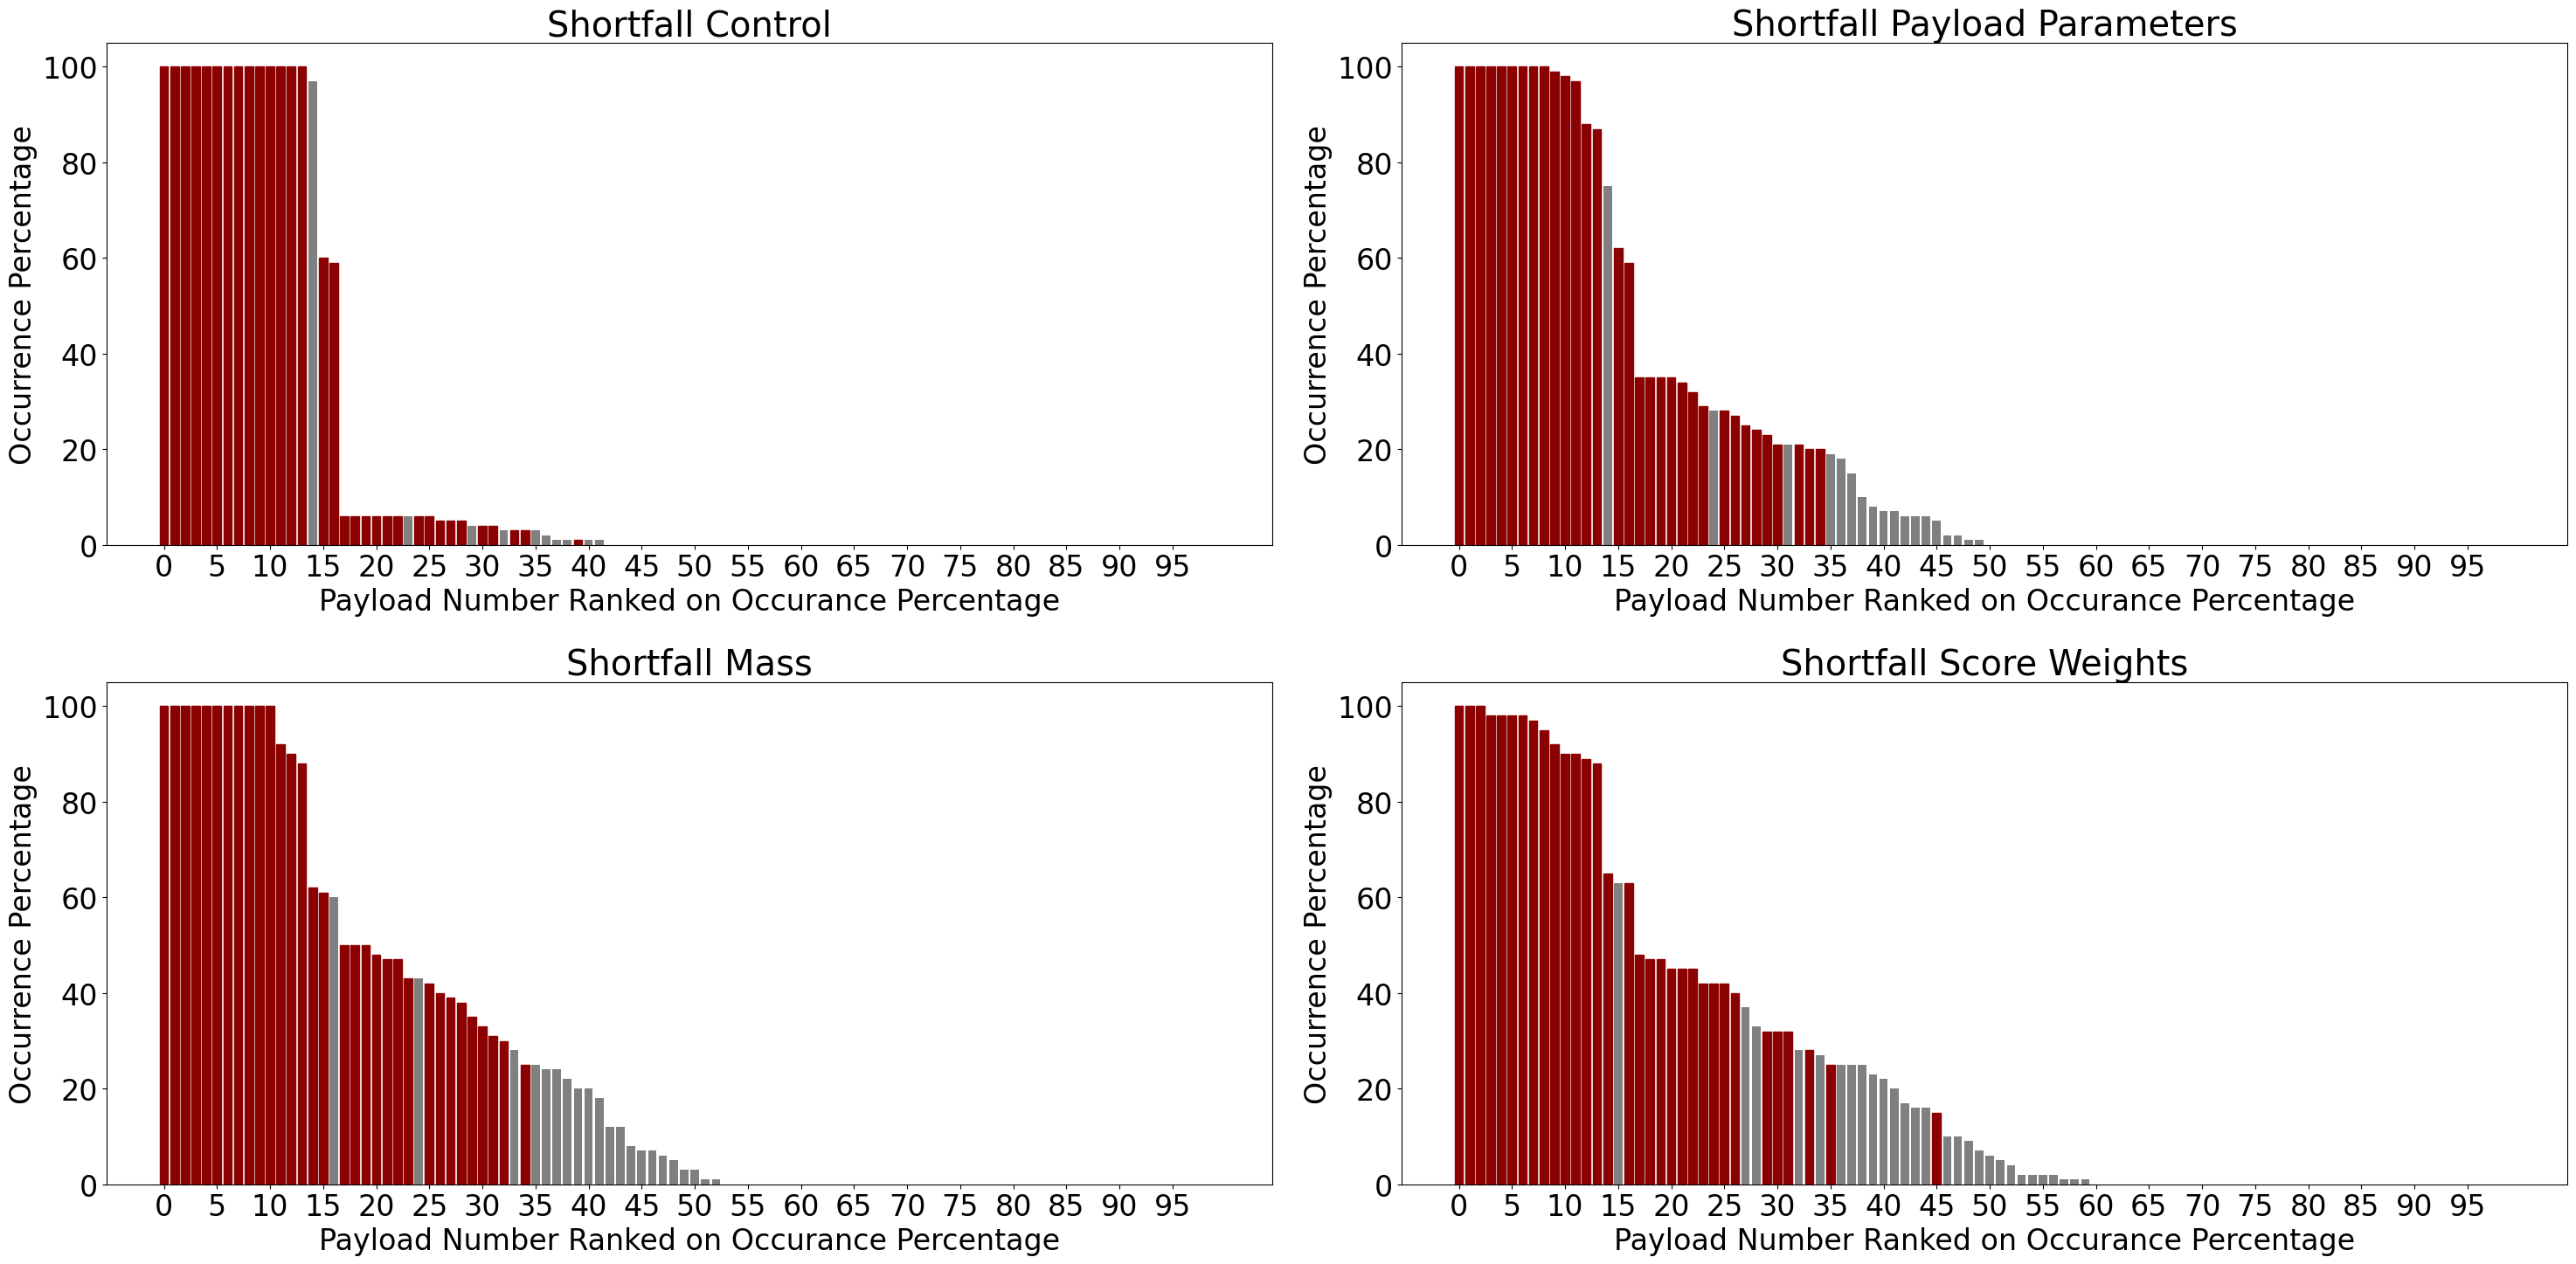

In [15]:

mpl.rcParams.update({'font.size': 24})
fig = plt.figure(figsize=(30, 15))

gs = gridspec.GridSpec(2, 2, height_ratios=[5, 5])  # Top row = 5, Bottom row = 10

# Bottom Left

with open('100__tech_control24-04-2025_18_16_59.json', 'r') as f:
    loaded_data = json.load(f)

s = loaded_data['seeds']
m = loaded_data['populations']
w = loaded_data['weights']
outputs_tech = []
count = 0
for i in m:
    outputs_tech.append(i)

result = []
with open('Techs_to_Bring_via_sort_22-10-2024_14_56_55.csv', 'rt') as f:
    array_x = csv.reader(f, skipinitialspace=True, quotechar="'")
    for line in array_x:
        result.append(line)
result = result[1:]
objectivs_names_temp = []
for i in result:
    objectivs_names_temp.append(i[1])
objectivs_names_temp = objectivs_names_temp[0:-1]

highlight_indices = objectivs_names_temp

percentages = np.mean(outputs_tech, axis=0) * 100
sorted_indices = np.argsort(-percentages)
sorted_percentages = percentages[sorted_indices]
indices = [row[0] for row in tech_array_mod]
indices = [indices[i] for i in sorted_indices]

ax3 = fig.add_subplot(gs[0, 0])
ax3.bar(indices, sorted_percentages, color='grey')
ax3.set_ylabel('Occurrence Percentage')
ax3.set_title(f'Shortfall Control')

tick_positions = list(range(0, len(indices), 5))  
tick_labels = [str(i) for i in tick_positions]
for label, bar, tick_label in zip(indices, ax3.patches, ax3.get_xticklabels()):
    if label in highlight_indices:
        bar.set_color('darkred')  

ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('Payload Number Ranked on Occurance Percentage')

  

with open('100_guassian_std_0.5_tech_mass24-04-2025_15_41_28.json', 'r') as f:
    loaded_data = json.load(f)

s = loaded_data['seeds']
m = loaded_data['populations']

outputs_tech = []
count = 0
for i in m:
    outputs_tech.append(i)


objectivs_names_temp = []
for i in result:
    objectivs_names_temp.append(i[1])
objectivs_names_temp = objectivs_names_temp[0:-1]

highlight_indices = objectivs_names_temp

percentages = np.mean(outputs_tech, axis=0) * 100
sorted_indices = np.argsort(-percentages)
sorted_percentages = percentages[sorted_indices]
indices = [row[0] for row in tech_array_mod]
indices = [indices[i] for i in sorted_indices]

ax3 = fig.add_subplot(gs[1, 0])
ax3.bar(indices, sorted_percentages, color='grey')
ax3.set_ylabel('Occurrence Percentage')
ax3.set_title(f'Shortfall Mass')

tick_positions = list(range(0, len(indices), 5))  
tick_labels = [str(i) for i in tick_positions]
for label, bar, tick_label in zip(indices, ax3.patches, ax3.get_xticklabels()):
    if label in highlight_indices:
        bar.set_color('darkred')  

ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('Payload Number Ranked on Occurance Percentage')



with open('100_guassian_std_0.5_tech_payload25-04-2025_18_57_15.json', 'r') as f:
    loaded_data = json.load(f)

s = loaded_data['seeds']
m = loaded_data['populations']

outputs_tech = []
count = 0
for i in m:
    outputs_tech.append(i)


objectivs_names_temp = []
for i in result:
    objectivs_names_temp.append(i[1])
objectivs_names_temp = objectivs_names_temp[0:-1]

highlight_indices = objectivs_names_temp

percentages = np.mean(outputs_tech, axis=0) * 100
sorted_indices = np.argsort(-percentages)
sorted_percentages = percentages[sorted_indices]
indices = [row[0] for row in tech_array_mod]
indices = [indices[i] for i in sorted_indices]

ax3 = fig.add_subplot(gs[0, 1])
ax3.bar(indices, sorted_percentages, color='grey')
ax3.set_ylabel('Occurrence Percentage')
ax3.set_title(f'Shortfall Payload Parameters')

tick_positions = list(range(0, len(indices), 5))  
tick_labels = [str(i) for i in tick_positions]
for label, bar, tick_label in zip(indices, ax3.patches, ax3.get_xticklabels()):
    if label in highlight_indices:
        bar.set_color('darkred')  

ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('Payload Number Ranked on Occurance Percentage')

with open('100_guassian_std_0.5_tech_weights24-04-2025_12_00_36.json', 'r') as f:
    loaded_data = json.load(f)

s = loaded_data['seeds']
m = loaded_data['populations']

outputs_tech = []
count = 0
for i in m:
    outputs_tech.append(i)


objectivs_names_temp = []
for i in result:
    objectivs_names_temp.append(i[1])
objectivs_names_temp = objectivs_names_temp[0:-1]

highlight_indices = objectivs_names_temp

percentages = np.mean(outputs_tech, axis=0) * 100
sorted_indices = np.argsort(-percentages)
sorted_percentages = percentages[sorted_indices]
indices = [row[0] for row in tech_array_mod]
indices = [indices[i] for i in sorted_indices]

ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(indices, sorted_percentages, color='grey')
ax3.set_ylabel('Occurrence Percentage')
ax3.set_title(f'Shortfall Score Weights')

tick_positions = list(range(0, len(indices), 5))  
tick_labels = [str(i) for i in tick_positions]
for label, bar, tick_label in zip(indices, ax3.patches, ax3.get_xticklabels()):
    if label in highlight_indices:
        bar.set_color('darkred')  

ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('Payload Number Ranked on Occurance Percentage')

plt.tight_layout()
plt.show()

# Plot full data set for science objectives

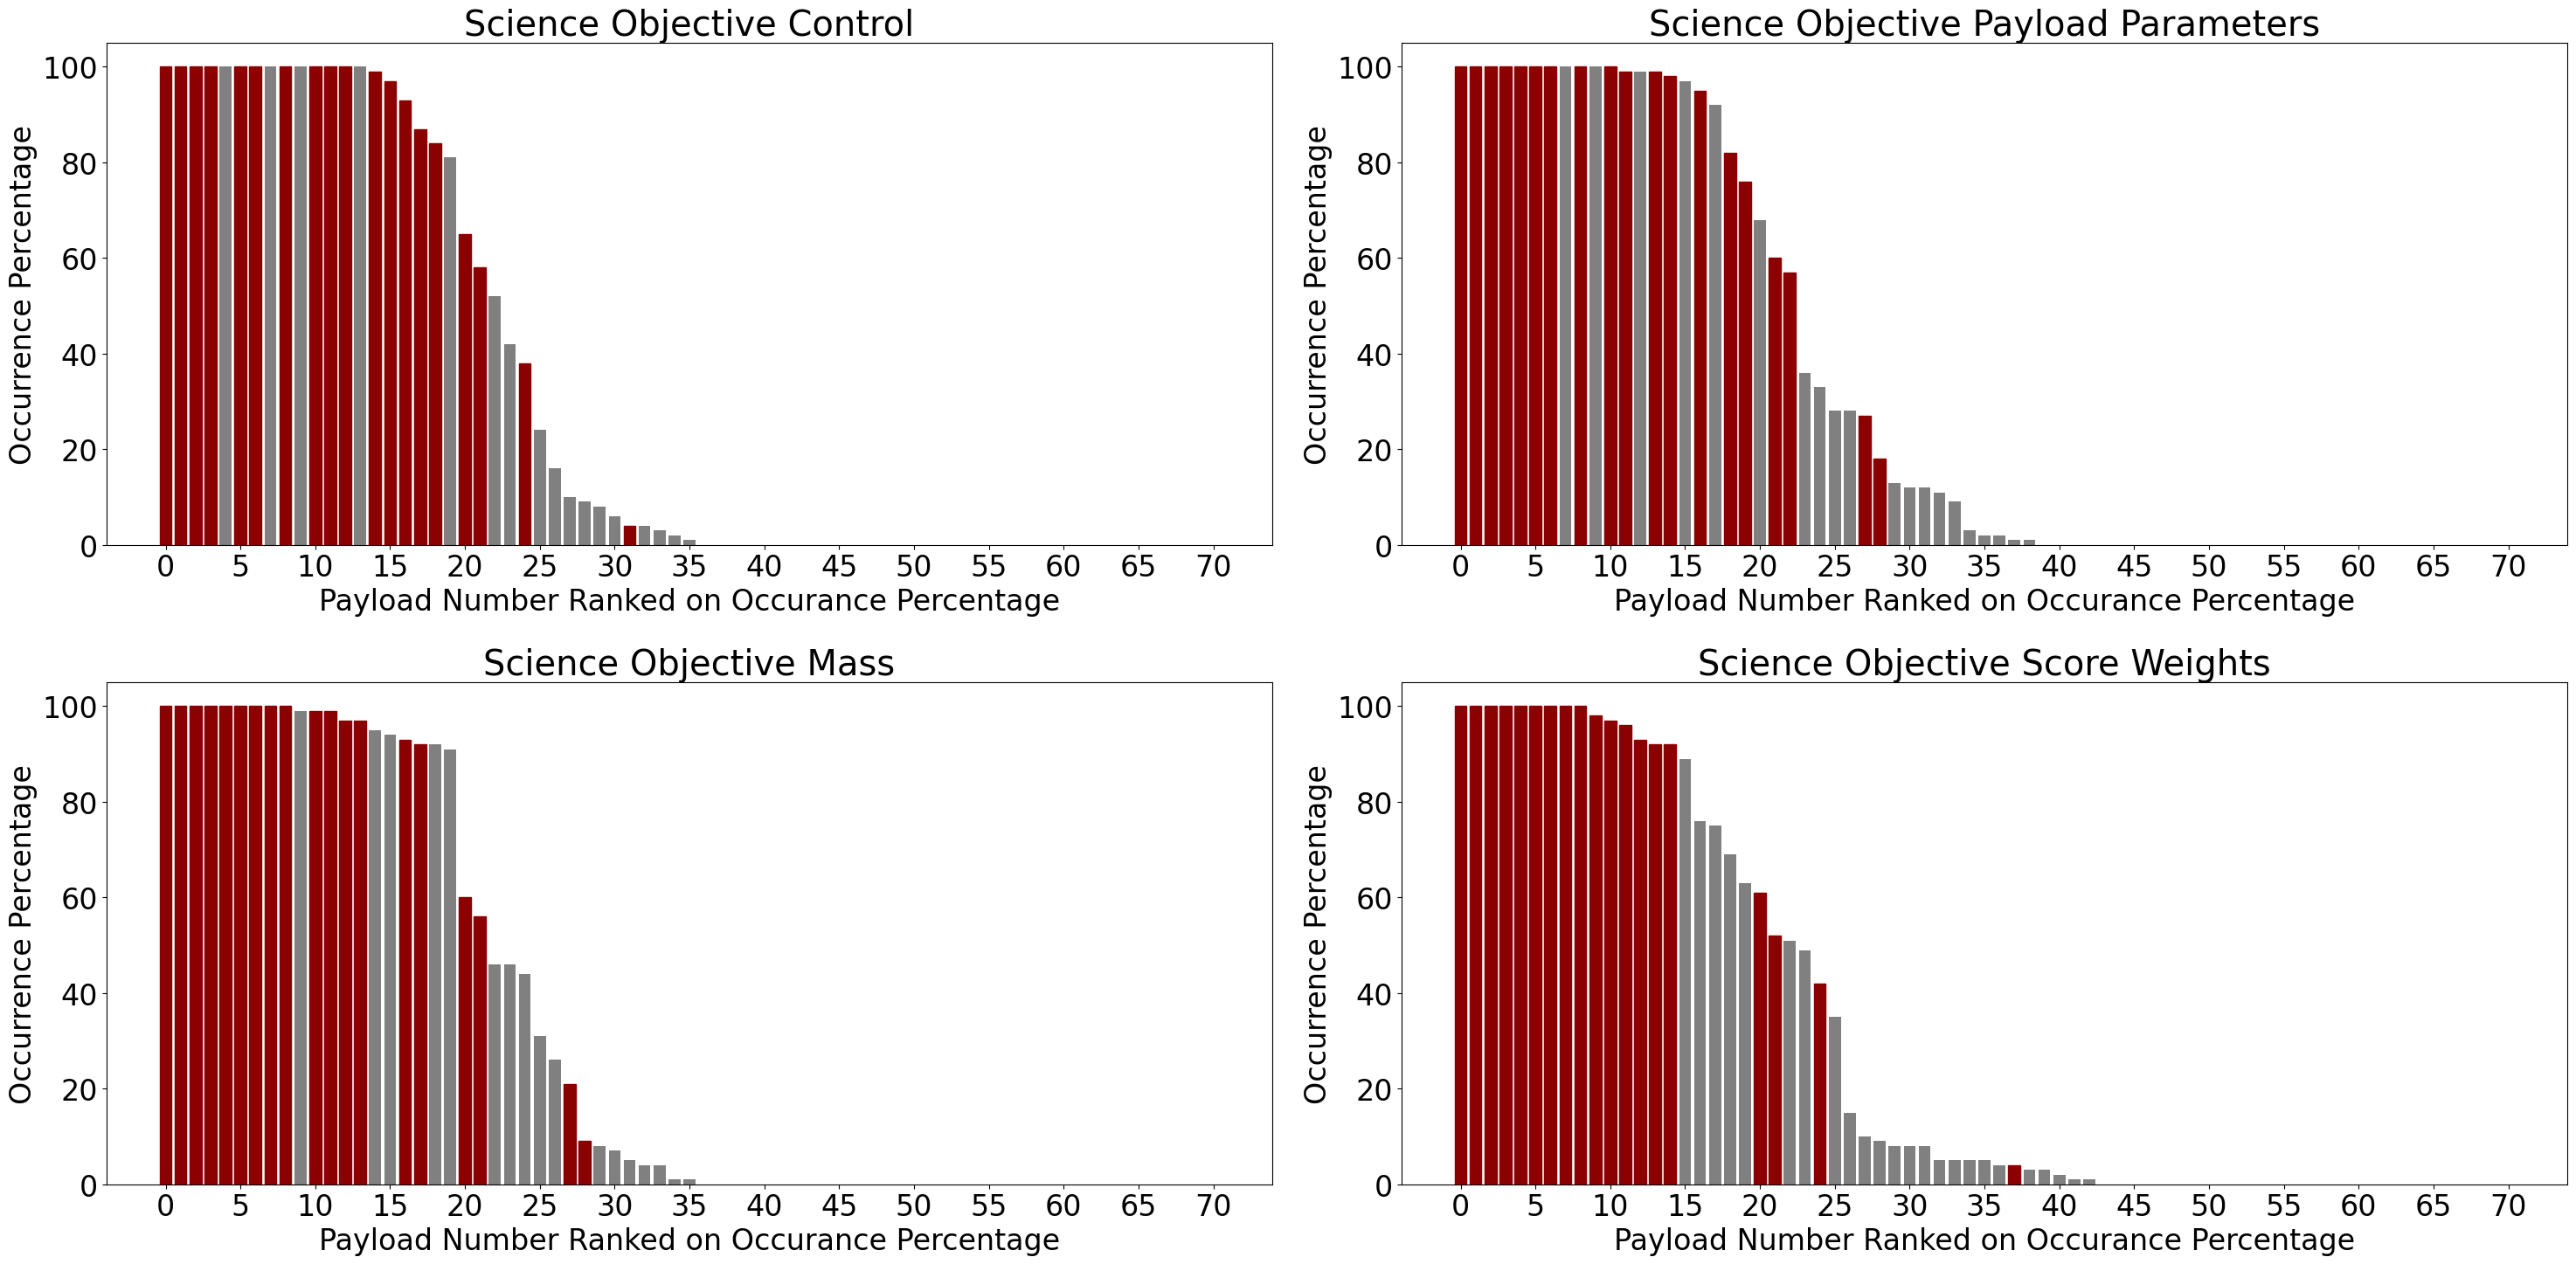

In [16]:

mpl.rcParams.update({'font.size': 24})
fig = plt.figure(figsize=(30, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[10, 10])  # Top row = 5, Bottom row = 10


# Bottom Left

with open('100_sci_control24-04-2025_21_38_16.json', 'r') as f:
    loaded_data = json.load(f)

s = loaded_data['seeds']
m = loaded_data['populations']
w = loaded_data['weights']
outputs_tech = []
count = 0
for i in m:
    outputs_tech.append(i)

result = []
with open('Experiments_to_Bring_Rebal-p32_r1_m7-1723-10-2024_11_18_51.csv', 'rt') as f:
    array_x = csv.reader(f, skipinitialspace=True, quotechar="'")
    for line in array_x:
        result.append(line)
result = result[1:]
objectivs_names_temp = []
for i in result:
    objectivs_names_temp.append(i[1])
objectivs_names_temp = objectivs_names_temp[0:-1]

highlight_indices = objectivs_names_temp

percentages = np.mean(outputs_tech, axis=0) * 100
sorted_indices = np.argsort(-percentages)
sorted_percentages = percentages[sorted_indices]
indices = [row[0] for row in science_array_array_mod]
indices = [indices[i] for i in sorted_indices]

ax3 = fig.add_subplot(gs[0, 0])
ax3.bar(indices, sorted_percentages, color='grey')
ax3.set_ylabel('Occurrence Percentage')
ax3.set_title(f'Science Objective Control')

tick_positions = list(range(0, len(indices), 5))  
tick_labels = [str(i) for i in tick_positions]
for label, bar, tick_label in zip(indices, ax3.patches, ax3.get_xticklabels()):
    if label in highlight_indices:
        bar.set_color('darkred')  

ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('Payload Number Ranked on Occurance Percentage')

  

with open('100_guassian_std_0.5_sci_mass25-04-2025_13_39_34.json', 'r') as f:
    loaded_data = json.load(f)

s = loaded_data['seeds']
m = loaded_data['populations']

outputs_tech = []
count = 0
for i in m:
    outputs_tech.append(i)


objectivs_names_temp = []
for i in result:
    objectivs_names_temp.append(i[1])
objectivs_names_temp = objectivs_names_temp[0:-1]

highlight_indices = objectivs_names_temp

percentages = np.mean(outputs_tech, axis=0) * 100
sorted_indices = np.argsort(-percentages)
sorted_percentages = percentages[sorted_indices]
indices = [row[0] for row in science_array_array_mod]
indices = [indices[i] for i in sorted_indices]

ax3 = fig.add_subplot(gs[1, 0])
ax3.bar(indices, sorted_percentages, color='grey')
ax3.set_ylabel('Occurrence Percentage')
ax3.set_title(f'Science Objective Mass')

tick_positions = list(range(0, len(indices), 5))  
tick_labels = [str(i) for i in tick_positions]
for label, bar, tick_label in zip(indices, ax3.patches, ax3.get_xticklabels()):
    if label in highlight_indices:
        bar.set_color('darkred')  

ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('Payload Number Ranked on Occurance Percentage')



with open('100_guassian_std_0.5_sci_payload25-04-2025_17_13_52.json', 'r') as f:
    loaded_data = json.load(f)

s = loaded_data['seeds']
m = loaded_data['populations']

outputs_tech = []
count = 0
for i in m:
    outputs_tech.append(i)


objectivs_names_temp = []
for i in result:
    objectivs_names_temp.append(i[1])
objectivs_names_temp = objectivs_names_temp[0:-1]

highlight_indices = objectivs_names_temp

percentages = np.mean(outputs_tech, axis=0) * 100
sorted_indices = np.argsort(-percentages)
sorted_percentages = percentages[sorted_indices]
indices = [row[0] for row in science_array_array_mod]
indices = [indices[i] for i in sorted_indices]

ax3 = fig.add_subplot(gs[0, 1])
ax3.bar(indices, sorted_percentages, color='grey')
ax3.set_ylabel('Occurrence Percentage')
ax3.set_title(f'Science Objective Payload Parameters')

tick_positions = list(range(0, len(indices), 5))  
tick_labels = [str(i) for i in tick_positions]
for label, bar, tick_label in zip(indices, ax3.patches, ax3.get_xticklabels()):
    if label in highlight_indices:
        bar.set_color('darkred')  

ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('Payload Number Ranked on Occurance Percentage')

with open('100_guassian_std_0.5_sci_weights23-04-2025_19_43_59.json', 'r') as f:
    loaded_data = json.load(f)

s = loaded_data['seeds']
m = loaded_data['populations']

outputs_tech = []
count = 0
for i in m:
    outputs_tech.append(i)


objectivs_names_temp = []
for i in result:
    objectivs_names_temp.append(i[1])
objectivs_names_temp = objectivs_names_temp[0:-1]

highlight_indices = objectivs_names_temp

percentages = np.mean(outputs_tech, axis=0) * 100
sorted_indices = np.argsort(-percentages)
sorted_percentages = percentages[sorted_indices]
indices = [row[0] for row in science_array_array_mod]
indices = [indices[i] for i in sorted_indices]

ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(indices, sorted_percentages, color='grey')
ax3.set_ylabel('Occurrence Percentage')
ax3.set_title(f'Science Objective Score Weights')

tick_positions = list(range(0, len(indices), 5))  
tick_labels = [str(i) for i in tick_positions]
for label, bar, tick_label in zip(indices, ax3.patches, ax3.get_xticklabels()):
    if label in highlight_indices:
        bar.set_color('darkred')  

ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels)
ax3.set_xlabel('Payload Number Ranked on Occurance Percentage')

plt.tight_layout()
plt.show()

# Full data summmarized

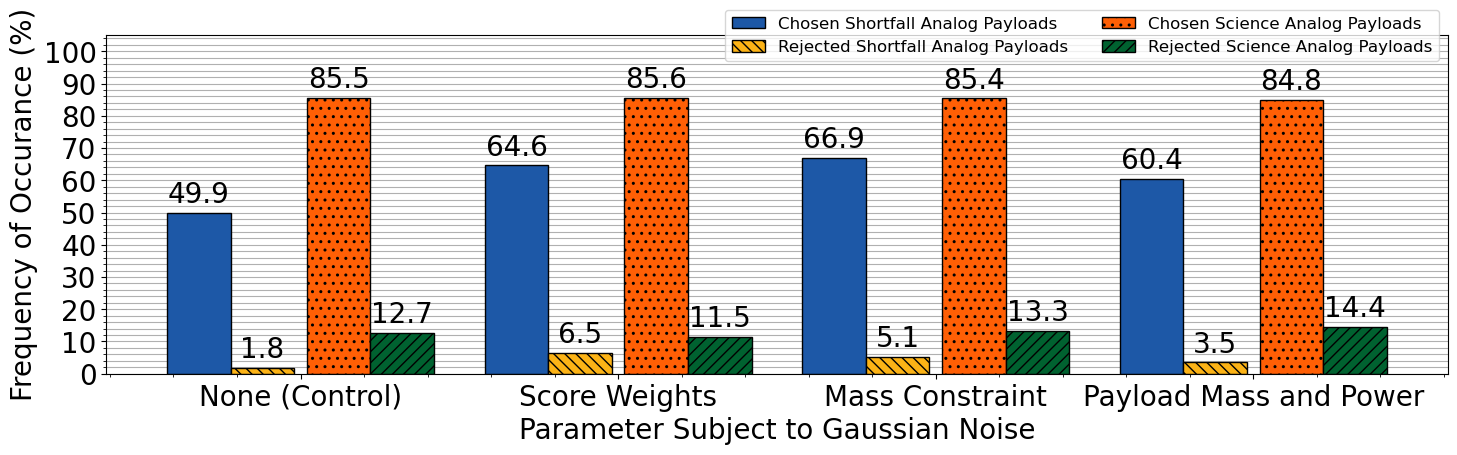

In [13]:

mpl.rcParams.update({'font.size': 20})
def average_occur(data, check,array_array_mod):
    m = data['populations']

    outputs = []
    count = 0
    for i in m:
        outputs.append(i)
    check = check[1:]
    objectivs_names_temp = []
    for i in check:
        objectivs_names_temp.append(i[1])
    objectivs_names_temp = objectivs_names_temp[0:-1]

    highlight_indices = objectivs_names_temp

    percentages = np.mean(outputs, axis=0) * 100
    sorted_indices = np.argsort(-percentages)
    sorted_percentages = percentages[sorted_indices]
    indices = [row[0] for row in array_array_mod]
    indices = [indices[i] for i in sorted_indices]

    count = 0
    sums = 0
    for i in range(0,len(indices)):
        if indices[i] in highlight_indices:
            count += 1
            sums += sorted_percentages[i]
    ave = sums/count
    return ave


def average_not_occur(data, check,array_array_mod):
    m = data['populations']

    outputs = []
    count = 0
    for i in m:
        outputs.append(i)
    check = check[1:]
    objectivs_names_temp = []
    for i in check:
        objectivs_names_temp.append(i[1])
    objectivs_names_temp = objectivs_names_temp[0:-1]

    highlight_indices = objectivs_names_temp

    percentages = np.mean(outputs, axis=0) * 100
    sorted_indices = np.argsort(-percentages)
    sorted_percentages = percentages[sorted_indices]
    indices = [row[0] for row in array_array_mod]
    indices = [indices[i] for i in sorted_indices]

    count = 0
    sums = 0
    for i in range(0,len(indices)):
        if not(indices[i] in highlight_indices):
            count += 1
            sums += sorted_percentages[i]
    ave = sums/count
    return ave

result = []
with open('Techs_to_Bring_via_sort_22-10-2024_14_56_55.csv', 'rt') as f:
    array_x = csv.reader(f, skipinitialspace=True, quotechar="'")
    for line in array_x:
        result.append(line)

with open('100__tech_control24-04-2025_18_16_59.json', 'r') as f:
    loaded_data = json.load(f)

tech_control_average = average_occur(loaded_data, result,tech_array_mod)
tech_control_naverage = average_not_occur(loaded_data, result,tech_array_mod)

with open('100_guassian_std_0.5_tech_weights24-04-2025_12_00_36.json', 'r') as f:
    loaded_data = json.load(f)

tech_weights_average = average_occur(loaded_data, result,tech_array_mod)
tech_weights_naverage = average_not_occur(loaded_data, result,tech_array_mod)

with open('100_guassian_std_0.5_tech_mass24-04-2025_15_41_28.json', 'r') as f:
    loaded_data = json.load(f)

tech_mass_average = average_occur(loaded_data, result,tech_array_mod)
tech_mass_naverage = average_not_occur(loaded_data, result,tech_array_mod)

with open('100_guassian_std_0.5_tech_payload25-04-2025_18_57_15.json', 'r') as f:
    loaded_data = json.load(f)

tech_in_mass_average = average_occur(loaded_data, result,tech_array_mod)
tech_in_mass_naverage = average_not_occur(loaded_data, result,tech_array_mod)

result = []
with open('Experiments_to_Bring_Rebal-p32_r1_m7-1723-10-2024_11_18_51.csv', 'rt') as f:
    array_x = csv.reader(f, skipinitialspace=True, quotechar="'")
    for line in array_x:
        result.append(line)

with open('100_sci_control24-04-2025_21_38_16.json', 'r') as f:
    loaded_data = json.load(f)

sci_control_average = average_occur(loaded_data, result,science_array_array_mod)
sci_control_naverage = average_not_occur(loaded_data, result,science_array_array_mod)

with open('100_guassian_std_0.5_sci_weights23-04-2025_19_43_59.json', 'r') as f:
    loaded_data = json.load(f)

sci_weights_average = average_occur(loaded_data, result,science_array_array_mod)
sci_weights_naverage = average_not_occur(loaded_data, result,science_array_array_mod)

with open('100_guassian_std_0.5_sci_mass25-04-2025_13_39_34.json', 'r') as f:
    loaded_data = json.load(f)

sci_mass_average = average_occur(loaded_data, result,science_array_array_mod)
sci_mass_naverage = average_not_occur(loaded_data, result,science_array_array_mod)

with open('100_guassian_std_0.5_sci_payload25-04-2025_17_13_52.json', 'r') as f:
    loaded_data = json.load(f)

sci_in_mass_average = average_occur(loaded_data, result,science_array_array_mod)
sci_in_mass_naverage = average_not_occur(loaded_data, result,science_array_array_mod)


labels = ['None (Control)','Score Weights', 'Mass Constraint', 'Payload Mass and Power']
category1 = [tech_control_average, tech_weights_average, tech_mass_average, tech_in_mass_average]
category2 = [tech_control_naverage, tech_weights_naverage, tech_mass_naverage, tech_in_mass_naverage]
category3 = [sci_control_average, sci_weights_average, sci_mass_average, sci_in_mass_average]
category4 = [sci_control_naverage, sci_weights_naverage, sci_mass_naverage, sci_in_mass_naverage]

x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars
split = 0.02

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_yticks(np.linspace(0,100,11))
ax.minorticks_on()
ax.grid(True,which='both',axis='y')
ax.set_axisbelow(True)
# Bars for category 1
bars1 = ax.bar(x - 3*width/2 - split, category1, width, edgecolor='black', hatch='', label='Chosen Shortfall Analog Payloads',color='#1D58A7') #color='#13294b'
bars2 = ax.bar(x - width/2 - split, category2, width, edgecolor='black', hatch='\\\\\\', label='Rejected Shortfall Analog Payloads',color='#FCB316') # color='#13294b',
bars3 = ax.bar(x + width/2 + split, category3, width, edgecolor='black', hatch='..', label='Chosen Science Analog Payloads',color='#FF5F05')
bars4 = ax.bar(x + 3*width/2 + split, category4, width, edgecolor='black', hatch='///', label='Rejected Science Analog Payloads',color='#006230')

# Labels and ticks
ax.set_ylabel('Frequency of Occurance (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,105)
ax.set_xlabel("Parameter Subject to Gaussian Noise")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.1), ncol=2,fontsize=12)

# Optional: Add data labels on top of bars
for bar in bars1 + bars2 + bars3 + bars4:
    height = np.round(bar.get_height(),1)
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()